# Importing the data to colab:

In [0]:
from google.colab import files

Upload the two files: model.py and ptb-lm.py


Also upload the ZIP file containing the data





In [0]:
uploaded = files.upload()

Saving data.zip to data.zip
Saving models.py to models.py
Saving ptb-lm.py to ptb-lm.py


In [0]:
# Extract the zip locally
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['data.zip']), 'r')
data.extractall()

In [0]:
# Verify that you have imported successfully
import os
os.listdir('/content')

['.config', 'data.zip', 'data', 'ptb-lm.py', 'models.py', 'sample_data']

# Running the RNN code:

**Commands for 4.1:**


--model=RNN --optimizer=ADAM --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --save_best --data="/content/data"


--model=GRU --optimizer=SGD_LR_SCHEDULE --initial_lr=10 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --save_best --data="/content/data"


--model=TRANSFORMER --optimizer=SGD_LR_SCHEDULE --initial_lr=20 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=6 --dp_keep_prob=0.9 --save_best --data="/content/data"



**Perplex for 4.1**:


- RNN: train:  120  val: 157
- GRU: train:   65  val: 104
- TRANSFORMER:  train:  67  val: 146



**Commands for 4.2:**

RNN
- --model=RNN --optimizer=SGD --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --data="/content/data"


- --model=RNN --optimizer=SGD_LR_SCHEDULE --initial_lr=1 --batch_size=20 --seq_len=35 --hidden_size=512 --num_layers=2 --dp_keep_prob=0.35 --data="/content/data"

GRU
- --model=GRU --optimizer=SGD --initial_lr=10 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --data="/content/data"

- --model=GRU --optimizer=ADAM --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --data="/content/data"

TRANSFO
- --model=TRANSFORMER --optimizer=SGD --initial_lr=20 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=6 --dp_keep_prob=.9 --data="/content/data"

- --model=TRANSFORMER --optimizer=ADAM --initial_lr=0.001 --batch_size=128 --seq_len=35 --hidden_size=512 --num_layers=2 --dp_keep_prob=.9 --data="/content/data"

In [0]:
!python "/content/ptb-lm.py" --model=RNN --optimizer=ADAM --initial_lr=0.0001 --batch_size=20 --seq_len=35 --hidden_size=1500 --num_layers=2 --dp_keep_prob=0.35 --save_best --data="/content/data"


########## Setting Up Experiment ######################

Putting log in RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_data=contentdata_0
Using the GPU
Loading data from /content/data
  vocabulary size: 10000

########## Running Main Loop ##########################

EPOCH 0 ------------------
step: 10	loss (sum over all examples' seen this epoch):3433.8355684280396	speed (wps):2235.9279150395405
step: 142	loss (sum over all examples' seen this epoch):36381.04743003845	speed (wps):2387.001272169571
step: 274	loss (sum over all examples' seen this epoch):67495.70872068405	speed (wps):2391.777827665676
step: 406	loss (sum over all examples' seen this epoch):97810.86664915085	speed (wps):2392.6304615210047
step: 538	loss (sum over all examples' seen this epoch):127903.57621192932	speed (wps):2392.849314907842
step: 670	loss (sum over all examples' seen this epoch):157749.31339979172	speed (wps):2392.44

Saving the files:

In [0]:
path_to_save = '/content/RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_data=contentdata_0'
os.listdir(os.path.join('/content', folder_to_save))

['learning_curves.npy', 'exp_config.txt', 'best_params.pt', 'log.txt']

In [0]:
for filename in os.listdir(path_to_save):
    if filename == "best_params.pt":
        continue
    files.download(os.path.join(path_to_save, filename))

Plotting the curve:

In [0]:
import matplotlib.pyplot as plt

In [0]:
def ppl_from_log(path_to_log):
    train_ppl = []
    val_ppl = []
    with open(path_to_log) as f:
        for line in f:
            line_split = line.split('\t')
            train_ppl.append(float(line_split[1].split()[-1]))
            val_ppl.append(float(line_split[2].split()[-1]))
    return train_ppl, val_ppl

In [0]:
train_ppl, val_ppl = ppl_from_log(os.path.join(path_to_save, 'log.txt'))

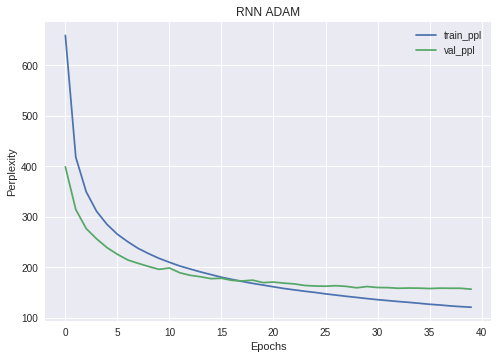

In [0]:
plt.plot(train_ppl, label="train_ppl")
plt.plot(val_ppl, label="val_ppl")
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title("RNN ADAM")
plt.legend()
plt.show()

***

***

# Saved curves

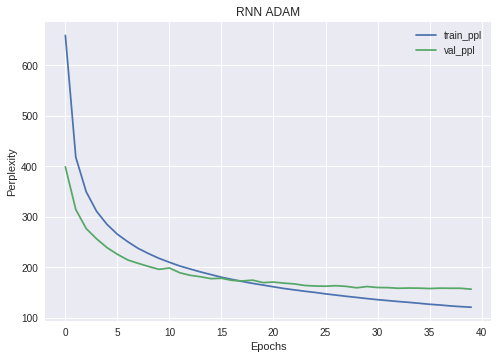

In [0]:
plt.plot(train_ppl, label="train_ppl")
plt.plot(val_ppl, label="val_ppl")
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title("RNN ADAM")
plt.legend()
plt.show()